## Lending Club Loan Case Study
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.<br>
1.In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. <br>
2.The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore')

#### Using this to remove unnecessary http, graph warnings

## Data Pull and Cleansing

In [4]:
df = pd.read_csv("loan.csv")

In [5]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Since we don't have idea for current ongoing loans, we can exclude them fron our data analysis

In [6]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [7]:
df_loan = df[df.loan_status != "Current"]

In [8]:
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 0 - Indicates Fully Paid Loans,1 - Indicates Charged off Loans

In [9]:
df_loan['default_status'] = df_loan.loan_status.apply(lambda x: 0 if x =="Fully Paid" else 1)

In [10]:
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
default_status                    0
Length: 112, dtype: int64

#### Removing the columns which have > 70% null values in the dataset

In [11]:
var = df_loan.columns[((df_loan.isnull().sum()/len(df_loan.index))*100 ) >70]

In [12]:
df_loan = df_loan.drop(var,axis=1)

In [13]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'default_status'],
      dtype='object')

In [14]:
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Filling out the Null values in a column with '0's and making max possible null free columns

In [15]:
df_loan['mths_since_last_delinq'] = df_loan['mths_since_last_delinq'].fillna(0)
df_loan['pub_rec_bankruptcies'] = df_loan['pub_rec_bankruptcies'].fillna(0)
df_loan['emp_length'] = df_loan['emp_length'].fillna(101)
df_loan['revol_util'] = df_loan['revol_util'].fillna(0)                       

### Among the following columns, most of the data is in the format of descriptive data and null value dominating columns which doesn't add any value when we start the data analysis and is of no proper value to business.Hence we decided to remove these columns

In [16]:
df_loan=df_loan.drop(columns=[ 'member_id','emp_title','url','desc','last_pymnt_d','last_pymnt_amnt'
                           ,'last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type',
                          'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens',
                          'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                           'collection_recovery_fee','id','pymnt_plan','title'])

In [17]:
df_loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,pub_rec_bankruptcies,default_status
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,3,0,13648,83.70%,9,f,0.0,0.0,0.0,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,3,0,1687,9.40%,4,f,0.0,0.0,0.0,1
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,2,0,2956,98.50%,10,f,0.0,0.0,0.0,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,10,0,5598,21%,37,f,0.0,0.0,0.0,0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,9,0,7963,28.30%,12,f,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,13,0,7274,13.10%,40,f,0.0,0.0,0.0,0
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,6,0,8847,26.90%,9,f,0.0,0.0,0.0,0
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,11,0,9698,19.40%,20,f,0.0,0.0,0.0,0
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,17,0,85607,0.70%,26,f,0.0,0.0,0.0,0


### Final Cleansed Data

In [18]:
df_loan.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
out_prncp                 0
out_prncp_inv             0
pub_rec_bankruptcies      0
default_status            0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

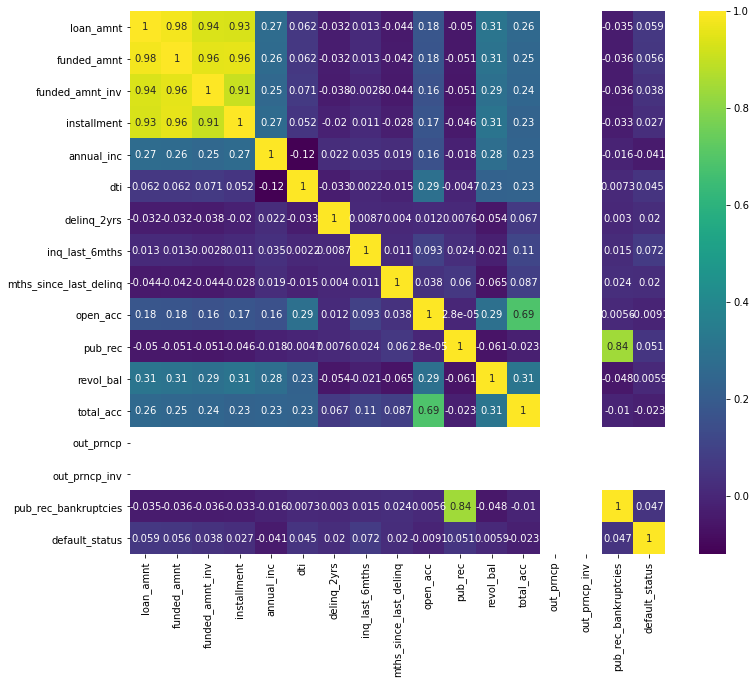

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_loan.corr(), annot=True, cmap='viridis')

In [21]:
df_loan=df_loan.drop(columns=['inq_last_6mths','pub_rec','total_acc','initial_list_status'
                              ,'out_prncp', 'out_prncp_inv' ])

#### We just plotted the above heatmap for the dataset to consider whatall columns have strong correlation with one another and determine which all variables are really helpful for business understanding

From above graph, it is clearly evident that the main columns of interest would be loan_amnt,funded_amnt,funded_amnt_inv, int_rate,grade,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti<br>

Business standpoint definitely suggests to use purpose,installment,term,verification_status,purpose,home_ownership and such important fields

## Variables finally we need to consider based on above observations

#### Categorical Variables:
purpose,
term,
verification_status,
home_ownership,
grade and sub_grade,
loan_status

#### Numeric Variables:
 loan_amnt,
 funded_amnt,
 funded_amnt_inv,
 int_rate,
 emp_length,
 annual_inc,
 issue_d,
 dti,
 installment,
 deliquency values

### We can also use these columns to derive some additional metrics and do some analysis over top of them

#### Extracting the numeric values from emp_length Column

In [22]:
import re
df_loan['emp_exp']=df_loan['emp_length'].apply(lambda x : re.findall('\d+',str(x))[0])

In [23]:
df_loan["emp_exp"] = df_loan["emp_exp"].apply(lambda x:int(x))

In [24]:
df_loan["emp_exp"].median()

4.0

#### Imputing Empty values with median value

### Note:
There are both null and 0 values in emp_length column, so first I'm replacing with 101 and then imputing median value

In [25]:
df_loan["emp_exp"] = df_loan["emp_exp"].apply(lambda x:4.0 if x==101 else x)

In [26]:
df_loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,revol_util,pub_rec_bankruptcies,default_status,emp_exp
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,27.65,0,Jan-85,0.0,3,13648,83.70%,0.0,0,10.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1.00,0,Apr-99,0.0,3,1687,9.40%,0.0,1,1.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,8.72,0,Nov-01,0.0,2,2956,98.50%,0.0,0,10.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,20.00,0,Feb-96,35.0,10,5598,21%,0.0,0,10.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,11.20,0,Nov-04,0.0,9,7963,28.30%,0.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,11.33,0,Nov-90,0.0,13,7274,13.10%,0.0,0,4.0
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,6.40,1,Dec-86,5.0,6,8847,26.90%,0.0,0,3.0
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,2.30,0,Oct-98,0.0,11,9698,19.40%,0.0,0,1.0
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,3.72,0,Nov-88,0.0,17,85607,0.70%,0.0,0,1.0


## Analysis and Visualizations

#### Calculating % of defaulted loans

In [27]:
df_loan.default_status.value_counts()

0    32950
1     5627
Name: default_status, dtype: int64

In [28]:
df_loan.default_status.mean()

0.14586411592399617

In [29]:
df_loan['loan_number']=1 # just for % calculation purpose
(df_loan.groupby('loan_status')['loan_number'].sum()/sum(df_loan['loan_number']))*100

loan_status
Charged Off    14.586412
Fully Paid     85.413588
Name: loan_number, dtype: float64

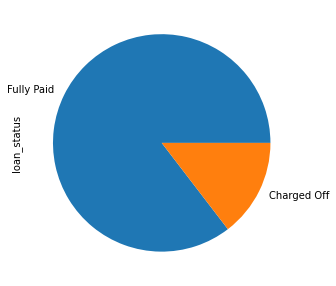

In [30]:
plt.figure(figsize=(14,5))
df_loan.loan_status.value_counts().plot.pie()
plt.show()

## Nearly 14.6% of loans are Charged off loans
Now we need to find out the driving factors among the considered columns for this defaulter percentages

#### Furthur data cleansing is needed to remove unnecessary special characters in the following mentioned columns

In [31]:
df_loan["int_rate"] = df_loan["int_rate"].apply(lambda x:float(x.split('%')[0]))
df_loan["term"] = df_loan["term"].apply(lambda x:int(x.split()[0]))

In [32]:
df_loan['year']= df_loan['issue_d'].apply(lambda x : "20"+x.split("-")[1])
df_loan['month']= df_loan['issue_d'].apply(lambda x : x.split("-")[0])

In [33]:
sns.set_style("darkgrid")

## Univariate Analysis

#### Will be providing numeric data as well below along with visualization

### Grade and SubGrade

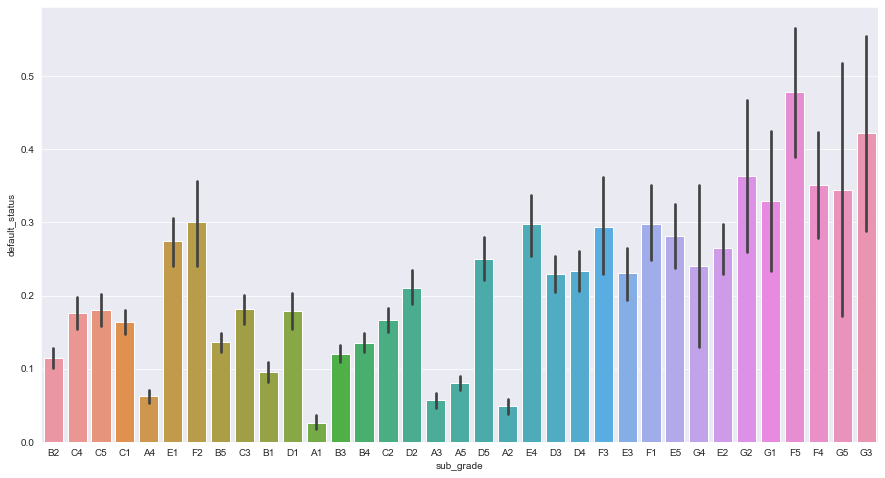

In [34]:
plt.figure(figsize=[15,8])
sns.barplot(data=df_loan, x="sub_grade", y="default_status")
plt.show()

### The above graph suggests that 'Higher the Grade of the Loan , Higher is the risk of becoming defaulter'. We can see F5 grade has highest ratio but as whole grade level G has Highest, one inference is that among the G grade G3 sub_grade has highest defaulter ratio. 

In [35]:
(df_loan.groupby('sub_grade')['default_status'].mean())*100

sub_grade
A1     2.633889
A2     4.907162
A3     5.690608
A4     6.195614
A5     7.992634
B1     9.515860
B2    11.394303
B3    12.070796
B4    13.500205
B5    13.613767
C1    16.350365
C2    16.623511
C3    18.145161
C4    17.578773
C5    18.024263
D1    17.937701
D2    21.073095
D3    22.939068
D4    23.420479
D5    25.059952
E1    27.423823
E2    26.547231
E3    23.062016
E4    29.716981
E5    28.165375
F1    29.836066
F2    30.042918
F3    29.310345
F4    35.099338
F5    47.787611
G1    32.978723
G2    36.363636
G3    42.222222
G4    24.074074
G5    34.482759
Name: default_status, dtype: float64

### Term

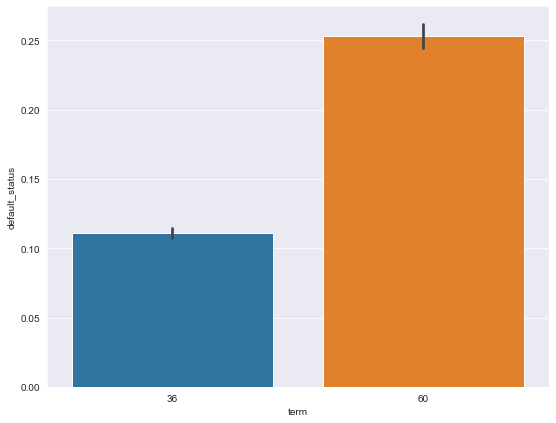

In [36]:
plt.figure(figsize=[9,7])
sns.barplot(data=df_loan, x="term", y="default_status")
plt.show()

### The above graph suggests that 'Higher the Term of the Loan , Higher is the risk of becoming defaulter'

In [37]:
(df_loan.groupby('term')['default_status'].mean())*100

term
36    11.090872
60    25.313785
Name: default_status, dtype: float64

### Employee Experience

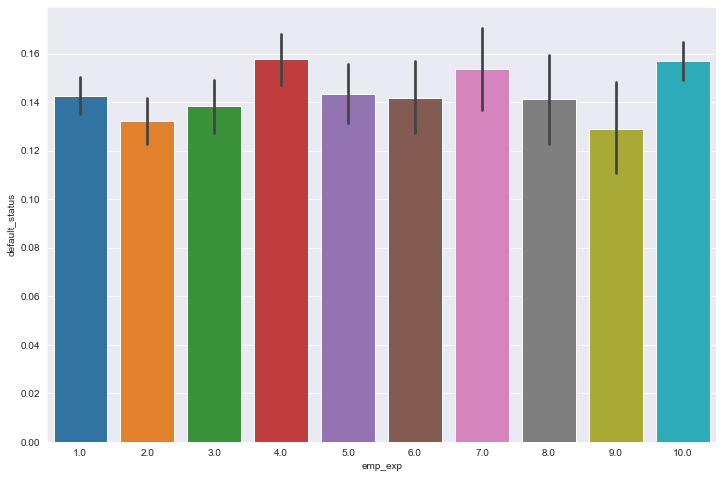

In [38]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="emp_exp", y="default_status")
plt.show()

In [39]:
(df_loan.groupby('emp_exp')['default_status'].mean())*100

emp_exp
1.0     14.263384
2.0     13.213703
3.0     13.833500
4.0     15.771429
5.0     14.339386
6.0     14.160517
7.0     15.371128
8.0     14.146341
9.0     12.887439
10.0    15.680961
Name: default_status, dtype: float64

#### Employee Experience Columns does not really have a proper Implication over defaulter's ratio

### Verification status

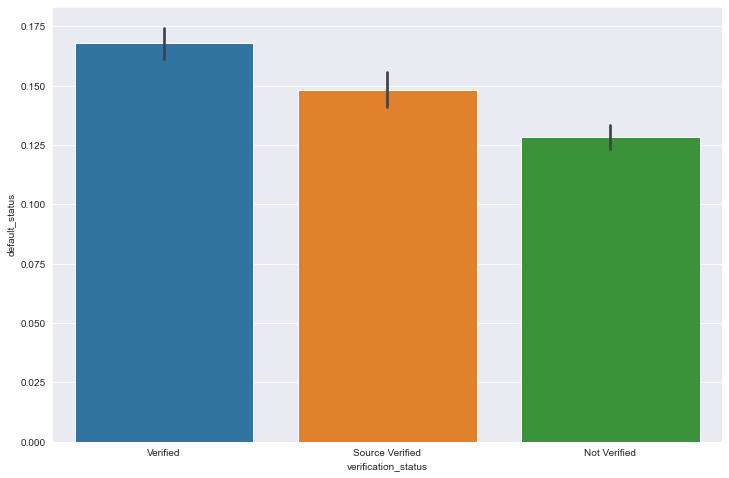

In [40]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="verification_status", y="default_status")
plt.show()

#### The Verified Status Loans have higher Default Ratio, This Metric stats needs to be checked once

In [41]:
(df_loan.groupby('verification_status')['default_status'].mean())*100

verification_status
Not Verified       12.830957
Source Verified    14.818642
Verified           16.803212
Name: default_status, dtype: float64

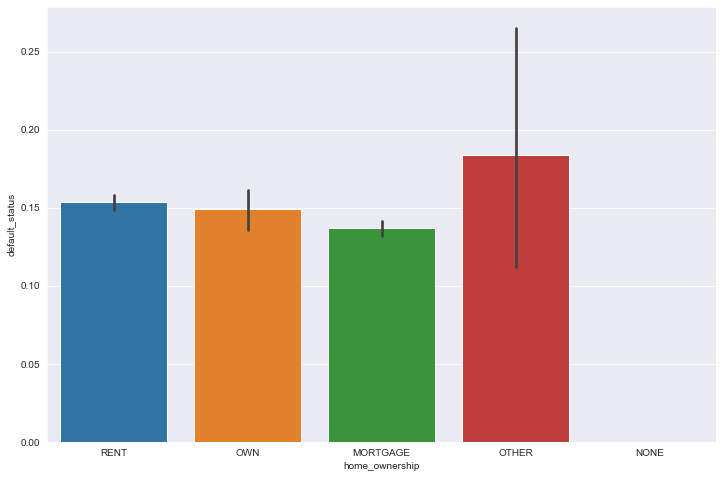

In [42]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="home_ownership", y="default_status")
plt.show()

In [43]:
(df_loan.groupby('home_ownership')['default_status'].mean())*100

home_ownership
MORTGAGE    13.671347
NONE         0.000000
OTHER       18.367347
OWN         14.890756
RENT        15.362554
Name: default_status, dtype: float64

#### The 'other' home ownership  customers have higher Default Ratio

### Year

<AxesSubplot:>

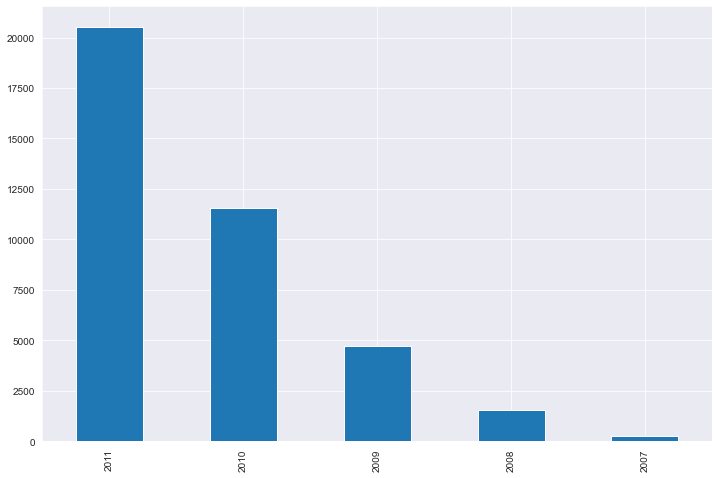

In [44]:
plt.figure(figsize=[12,8])
df_loan['year'].value_counts().plot.bar()

In [45]:
df_loan.groupby('year')['default_status'].value_counts().unstack()

default_status,0,1
year,,
2007,206,45
2008,1315,247
2009,4122,594
2010,10047,1485
2011,17260,3256


In [46]:
(df_loan.groupby('year')['default_status'].mean())*100

year
2007    17.928287
2008    15.813060
2009    12.595420
2010    12.877211
2011    15.870540
Name: default_status, dtype: float64

#### The year column doessn't really help here, as we can see there is no particular pattern here because the no of loans that were taken are of huge difference between 2007 and 2011

### Month

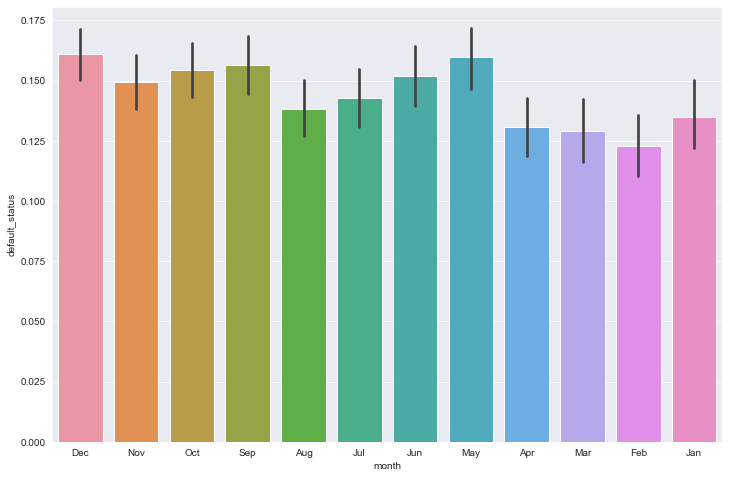

In [47]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="month", y="default_status")
plt.show()

#### Most no .of default ratio is present in Dec month issued loans , followed by may,june , september and october. There is no paricular inference

## Purpose

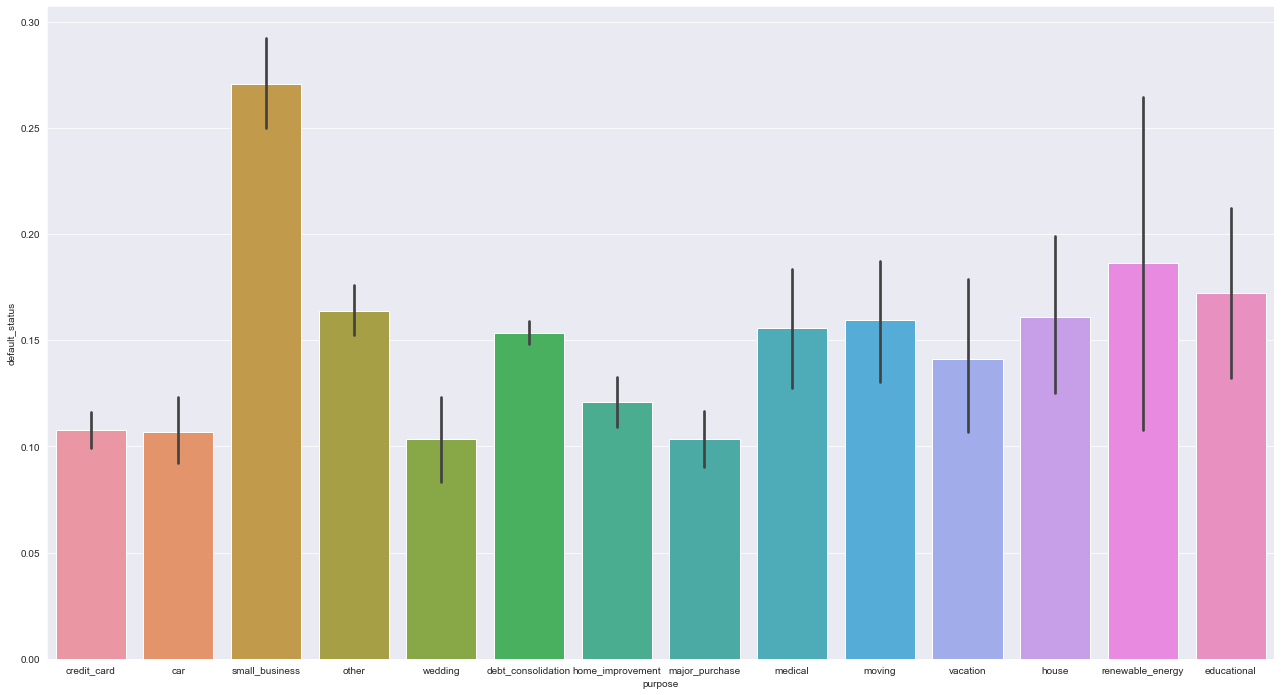

In [48]:
plt.figure(figsize=[22,12])
sns.barplot(data=df_loan, x="purpose", y="default_status")
plt.show()

In [49]:
(df_loan.groupby('purpose')['default_status'].mean())*100

purpose
car                   10.673783
credit_card           10.781778
debt_consolidation    15.325395
educational           17.230769
home_improvement      12.069565
house                 16.076294
major_purchase        10.325581
medical               15.565345
moving                15.972222
other                 16.377749
renewable_energy      18.627451
small_business        27.080958
vacation              14.133333
wedding               10.367171
Name: default_status, dtype: float64

In [50]:
df_loan.groupby('purpose')['default_status'].value_counts().unstack()

default_status,0,1
purpose,,
car,1339,160
credit_card,4485,542
debt_consolidation,15288,2767
educational,269,56
home_improvement,2528,347
house,308,59
major_purchase,1928,222
medical,575,106
moving,484,92


#### 'debt_consolidation','credit_card','home_improvement','other','major_purchase','small_business' are the important purposes that we need to consider as they are covering most(~85-90%) of loan purposes. The above cells contain exact counts and defaulting ratios of these purposes

# Segmented Univariate

## Note
#### There are a few outliers in the data for various important columns, but we still needed those data points as they are also important from businness standpoint, so while performing binning below, we merged those outliers as well in the max valueing of bins.

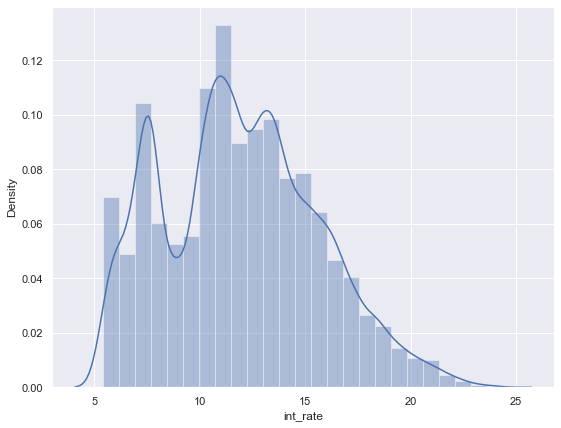

In [50]:
plt.figure(figsize=[9,7])
sns.set_theme(style='darkgrid')
sns.distplot(df_loan['int_rate'],bins=25,hist=True)
plt.show()

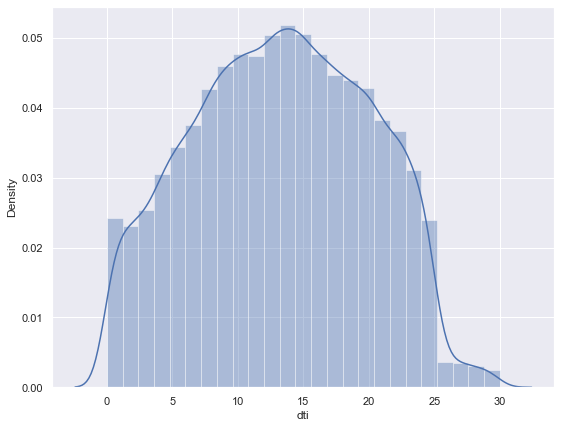

In [51]:
plt.figure(figsize=[9,7])
sns.set_theme(style='darkgrid')
sns.distplot(df_loan['dti'],bins=25,hist=True)
plt.show()

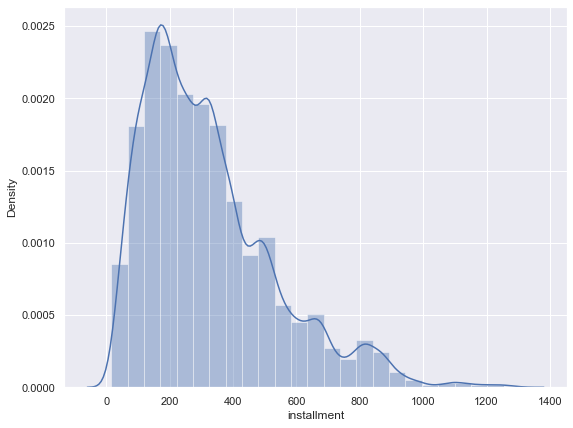

In [52]:
plt.figure(figsize=[9,7])
sns.set_theme(style='darkgrid')
sns.distplot(df_loan['installment'],bins=25,hist=True)
plt.show()

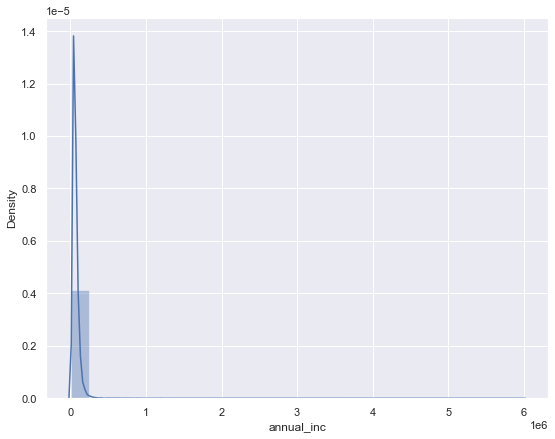

In [53]:
plt.figure(figsize=[9,7])
sns.set_theme(style='darkgrid')
sns.distplot(df_loan['annual_inc'],bins=25,hist=True)
plt.show()

### When we see above numerical data graphs, we can say that the density and flucatuations in them are specified to particular ranges for respective fields. Though we can get some insights, they might not be of much help, so instead we will do some segmentation on them and do analysis later on.

<Figure size 720x504 with 0 Axes>

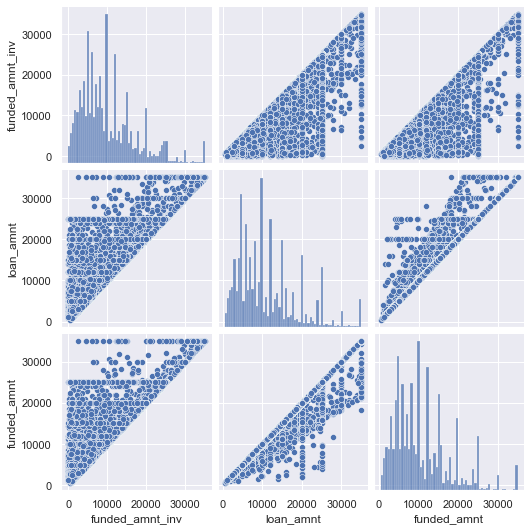

In [54]:
plt.figure(figsize=[10,7])
sns.pairplot(df_loan[['funded_amnt_inv', 'loan_amnt', 'funded_amnt']])
plt.show()

### We have the meanings of above columns already and now using above plot , we can see that all of them follow strong correlation with each other.So we can use any one of them for analysis, as they yield similar formatted results in analysis

#### we are binning these variables as they are huge ranging and we can get better insights if we have simpler segments of the following continuous variables

#### To determine , how to bifurgate into bins, we are checking min and max values of the columns and creating bins according to them

#### Annual Income

In [55]:
min(df_loan['annual_inc'])

4000.0

In [56]:
max(df_loan['annual_inc'])

6000000.0

In [57]:
bins = [0, 25000, 50000, 75000, 100000, 1000000]
labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
df_loan['annual_inc_range'] = pd.cut(df_loan['annual_inc'], bins, labels=labels)

In [58]:
(df_loan.groupby('annual_inc_range')['default_status'].mean())*100

annual_inc_range
0-25000         19.137255
25000-50000     16.551133
50000-75000     14.449777
75000-100000    12.187448
100000+         10.810316
Name: default_status, dtype: float64

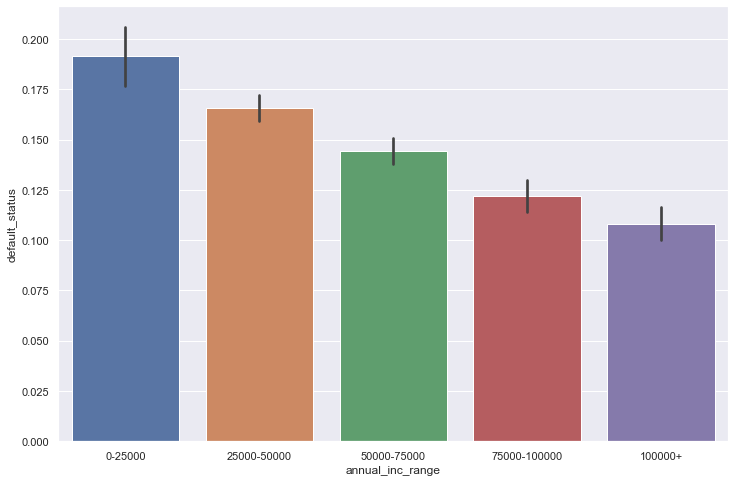

In [59]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="annual_inc_range", y="default_status")
plt.show()

#### Lower the Annual Income range of customer, higher the risk of falling into defaulter state

### Loan Ammount

In [60]:
min(df_loan['loan_amnt'])

500

In [61]:
max(df_loan['loan_amnt'])

35000

In [62]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
df_loan['loan_amnt_range'] = pd.cut(df_loan['loan_amnt'], bins, labels=labels)

In [63]:
(df_loan.groupby('loan_amnt_range')['loan_number'].sum()/sum(df_loan['loan_number']))*100

loan_amnt_range
0-5000         24.553490
5000-10000     33.185577
10000-15000    19.916012
15000-20000    11.273557
20000-25000     7.351531
25000+          3.719833
Name: loan_number, dtype: float64

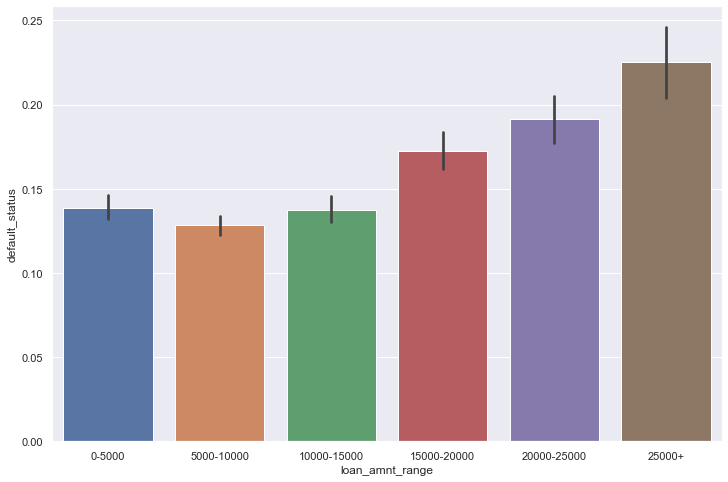

In [64]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="loan_amnt_range", y="default_status")
plt.show()

In [65]:
(df_loan.groupby('loan_amnt_range')['default_status'].mean())*100

loan_amnt_range
0-5000         13.872466
5000-10000     12.826121
10000-15000    13.731615
15000-20000    17.268338
20000-25000    19.111425
25000+         22.508711
Name: default_status, dtype: float64

#### Higher the Loan amount of customer, higher the risk of falling into defaulter state

### dti Range

In [66]:
min(df_loan['dti'])

0.0

In [67]:
max(df_loan['dti'])

29.99

In [68]:
bins = [0.0, 10.0, 20.0,30.0]
labels = ['0-10', '10-20', '20-30']
df_loan['dti_range'] = pd.cut(df_loan['dti'], bins, labels=labels)

In [69]:
(df_loan.groupby('dti_range')['default_status'].mean())*100

dti_range
0-10     12.557811
10-20    15.134754
20-30    16.733787
Name: default_status, dtype: float64

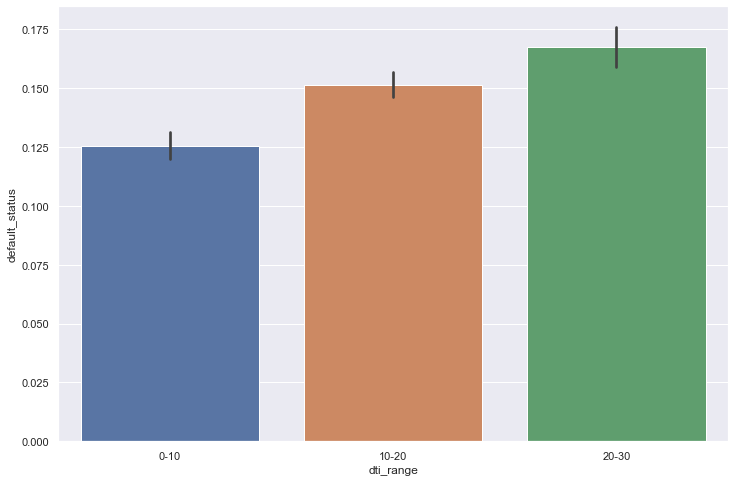

In [70]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="dti_range", y="default_status")
plt.show()

#### dti is debt to income ratio, so higher the dti range of customer, higher the risk of falling into defaulter state

### Interest Rate Range

In [71]:
max(df_loan['int_rate'])

24.4

In [72]:
min(df_loan['int_rate'])

5.42

In [73]:
bins = [5,10,15, 20,25]
labels = ['5-10', '10-15', '15-20','20-25']
df_loan['int_rate_range'] = pd.cut(df_loan['int_rate'], bins, labels=labels)

In [74]:
(df_loan.groupby('int_rate_range')['default_status'].mean())*100

int_rate_range
5-10      6.739201
10-15    14.820695
15-20    24.827014
20-25    38.441558
Name: default_status, dtype: float64

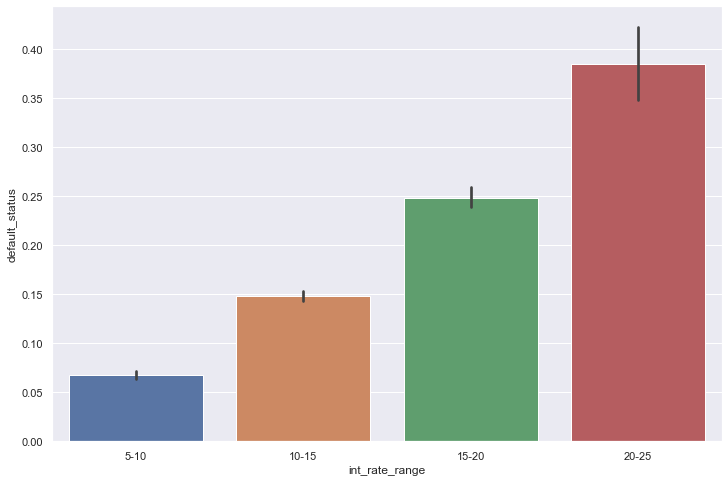

In [75]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="int_rate_range", y="default_status")
plt.show()

#### Higher the Interest rate for the loan of customer, higher the risk of falling into defaulter state

### Investor Funding amount

In [76]:
max(df_loan['funded_amnt_inv'])

35000.0

In [77]:
min(df_loan['funded_amnt_inv'])

0.0

In [78]:
bins = [0, 5000, 10000, 15000, 20000, 35000]
labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000+']
df_loan['funded_amnt_inv_range'] = pd.cut(df_loan['funded_amnt_inv'], bins, labels=labels)

In [79]:
(df_loan.groupby('funded_amnt_inv_range')['default_status'].mean())*100

funded_amnt_inv_range
0-5000         14.689747
5000-10000     12.745943
10000-15000    13.771826
15000-20000    17.896586
20000+         18.732234
Name: default_status, dtype: float64

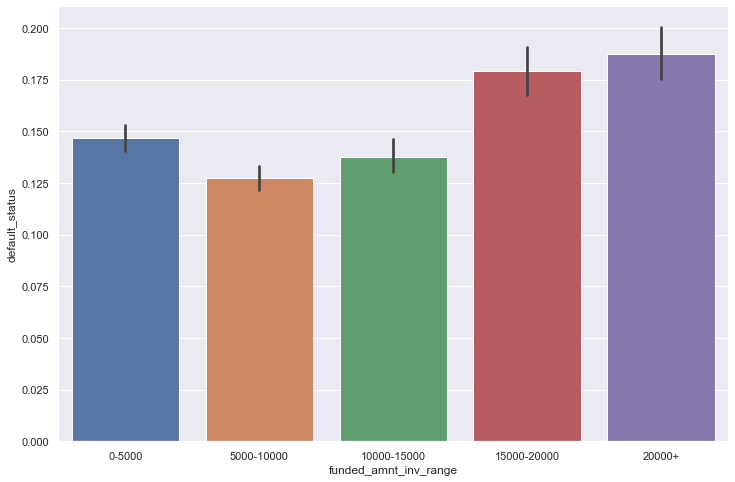

In [80]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="funded_amnt_inv_range", y="default_status")
plt.show()

#### Funded amount Inv is similar to that of Loan amount in terms of trend, so higher the range of funded-amnt_inv, higher the risk of falling into defaulter state

### Installment amount Range

In [81]:
max(df_loan['installment'])

1305.19

In [82]:
min(df_loan['installment'])

15.69

In [83]:
bins = [10,200,400,600, 800,1400]
labels = ['10-200','200-400', '400-600', '600-800','800-1400']
df_loan['installment_range'] = pd.cut(df_loan['installment'], bins, labels=labels)

In [84]:
(df_loan.groupby('installment_range')['default_status'].mean())*100

installment_range
10-200      13.867217
200-400     13.996742
400-600     15.968307
600-800     16.420174
800-1400    17.250159
Name: default_status, dtype: float64

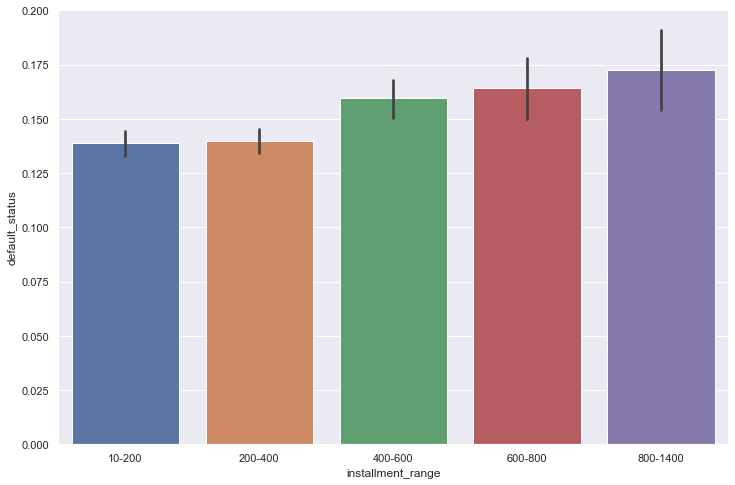

In [85]:
plt.figure(figsize=[12,8])
sns.barplot(data=df_loan, x="installment_range", y="default_status")
plt.show()

#### Higher the installment amount for a given loan, higher the risk of falling into defaulter state

In [86]:
(df_loan.groupby('installment_range')['default_status'].mean())*100

installment_range
10-200      13.867217
200-400     13.996742
400-600     15.968307
600-800     16.420174
800-1400    17.250159
Name: default_status, dtype: float64

# Bivariate Analysis

<AxesSubplot:>

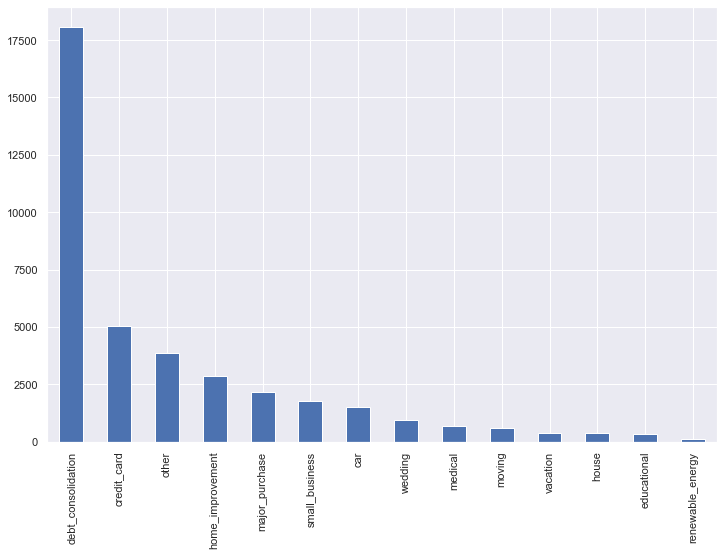

In [87]:
plt.figure(figsize=[12,8])
df_loan.purpose.value_counts().plot.bar()

In [88]:
df_loan.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

### 'debt_consolidation','credit_card','home_improvement','other','major_purchase','small_business' are the important purposes that we need to consider as they are covering most(~85-90%) of loan purposes. (also mentioned above in univariate analysis. So we are taking these purposes only into a separate dataset and doing our analysis on it

In [89]:
bivardf= df_loan[df_loan['purpose'].isin(['debt_consolidation','credit_card','home_improvement',
                                          'other','major_purchase','small_business'])]

#### The following few visualizations will be with respect to purpose, since the most important base of the loan is 'on what purpose the loan has been applied'

#### loan_amnt_range

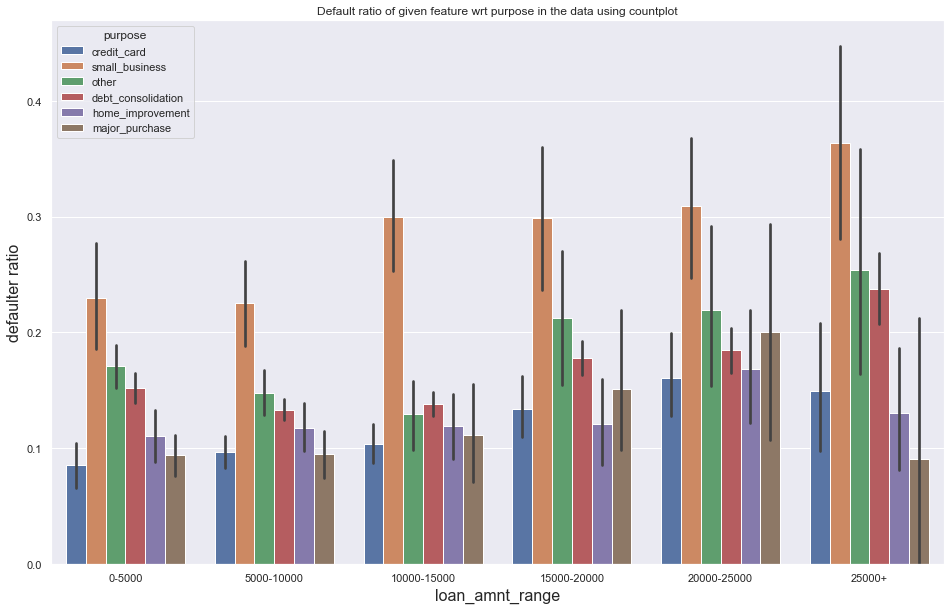

In [90]:
plt.figure(figsize=[16,10])
sns.barplot(x="loan_amnt_range", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("loan_amnt_range", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### loan_amnt_range wrt purpose , we can observe the similar upward trend for mostly all the purposes that, defaulter ratio increases with increase of loan amount

### funded_amnt_inv_range

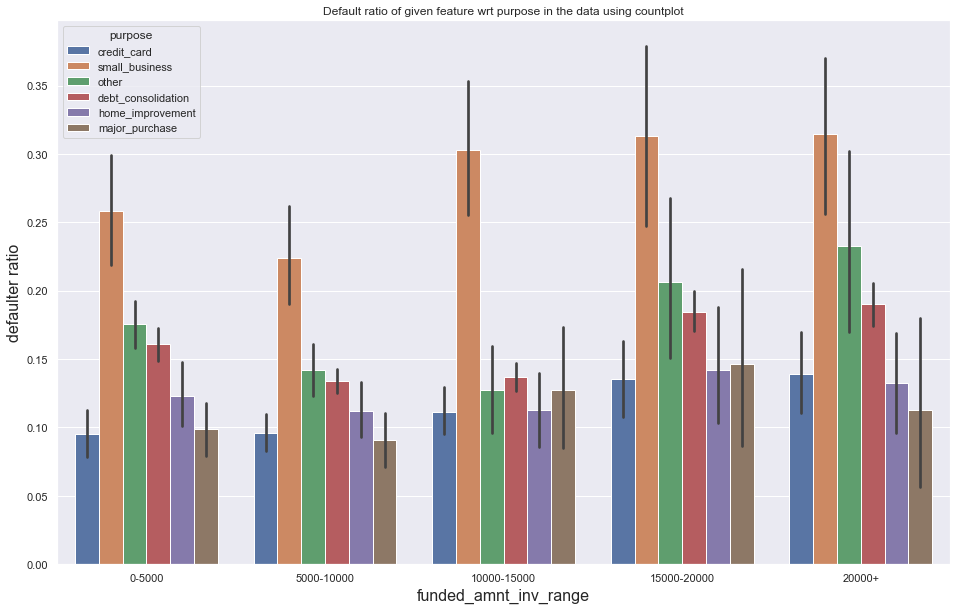

In [91]:
plt.figure(figsize=[16,10])
sns.barplot(x="funded_amnt_inv_range", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("funded_amnt_inv_range", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### funded_amnt_inv_range wrt purpose , we can observe the similar or upward trend for mostly all the purposes , defaulter ratio increases with increase of loan amount

### annual_inc_range

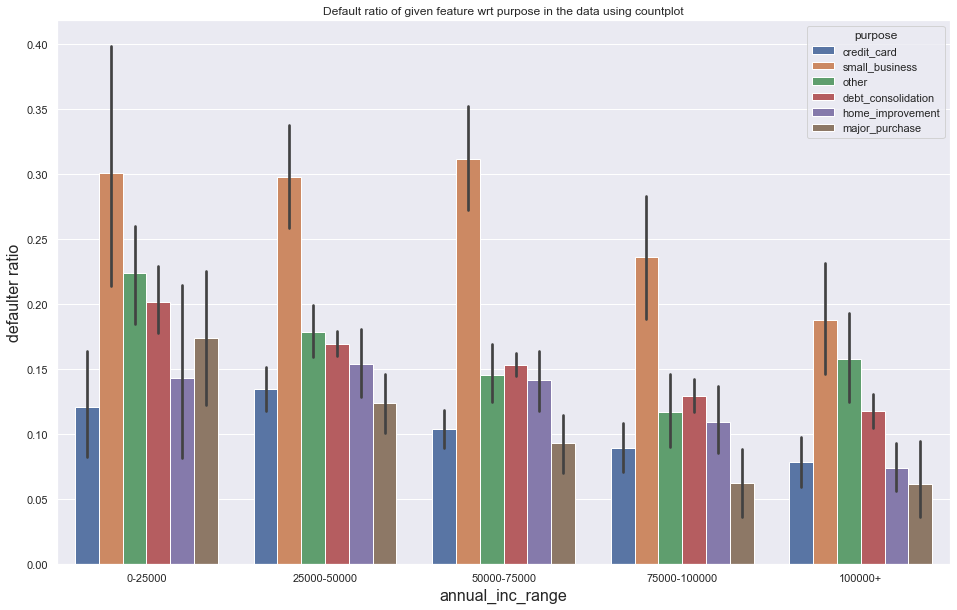

In [92]:
plt.figure(figsize=[16,10])
sns.barplot(x="annual_inc_range", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("annual_inc_range", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### annual_inc_range wrt purpose , we can observe the similar or downward trend for mostly all the purposes , defaulter ratio is highest for low income ranges

### Term

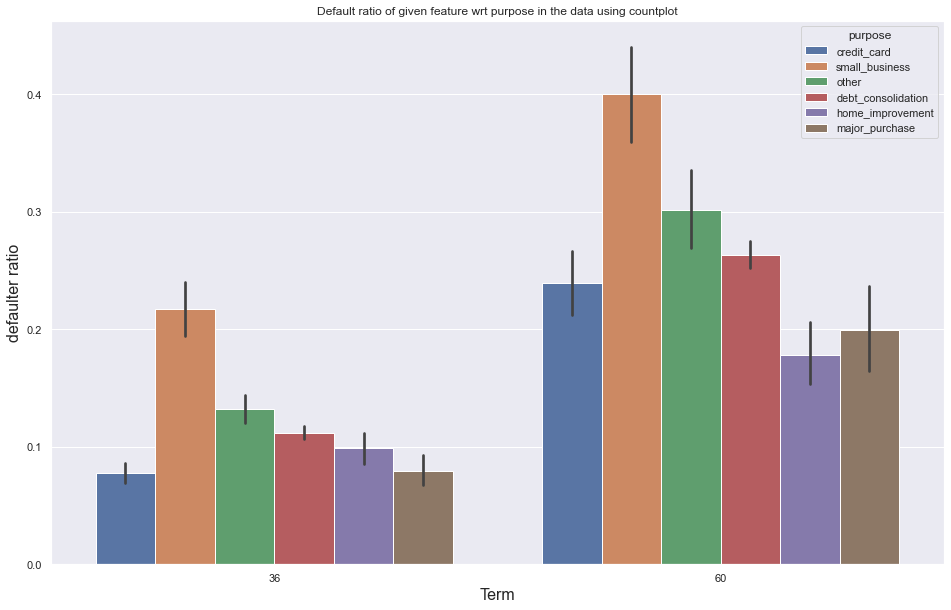

In [93]:
plt.figure(figsize=[16,10])
sns.barplot(x="term", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("Term", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### term wrt purpose , we can observe the  upward trend for all the purposes , defaulter ratio increases with increase of term period

### int_rate_range

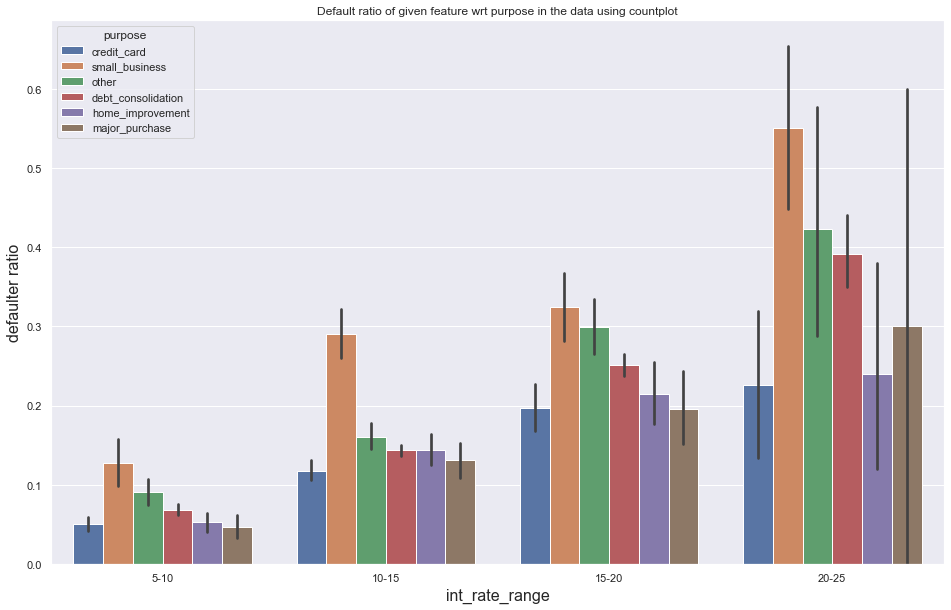

In [94]:
plt.figure(figsize=[16,10])
sns.barplot(x="int_rate_range", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("int_rate_range", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### interest range wrt purpose , we can observe the upward trend for all the purposes , defaulter ratio increases with increase of interest rate on given loan.

### installment_range

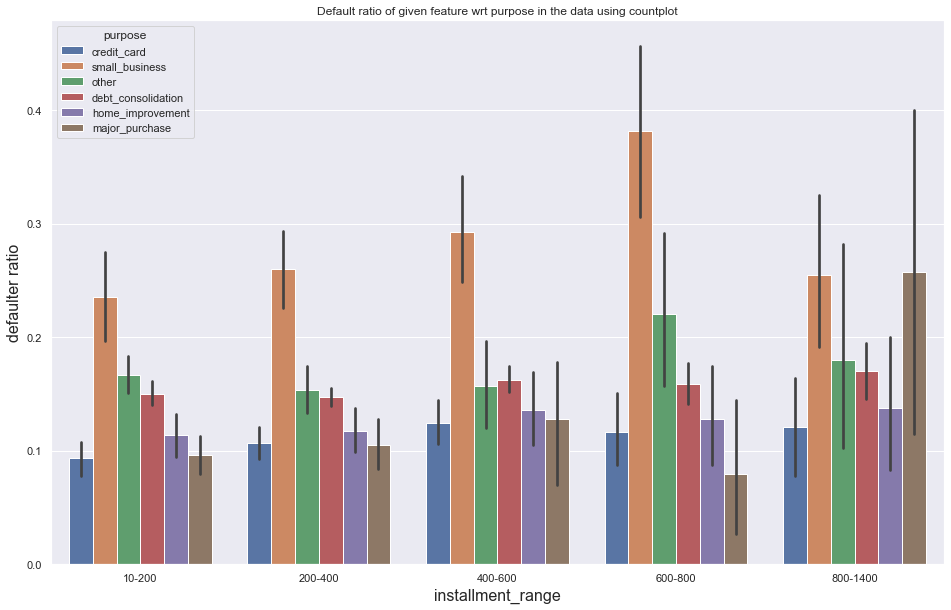

In [95]:
plt.figure(figsize=[16,10])
sns.barplot(x="installment_range", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("installment_range", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### installment_range wrt purpose , we can observe the similar or upward trend for mostly all the purposes , defaulter ratio increases with increase of installment amounts of loan.

### Employee Exp

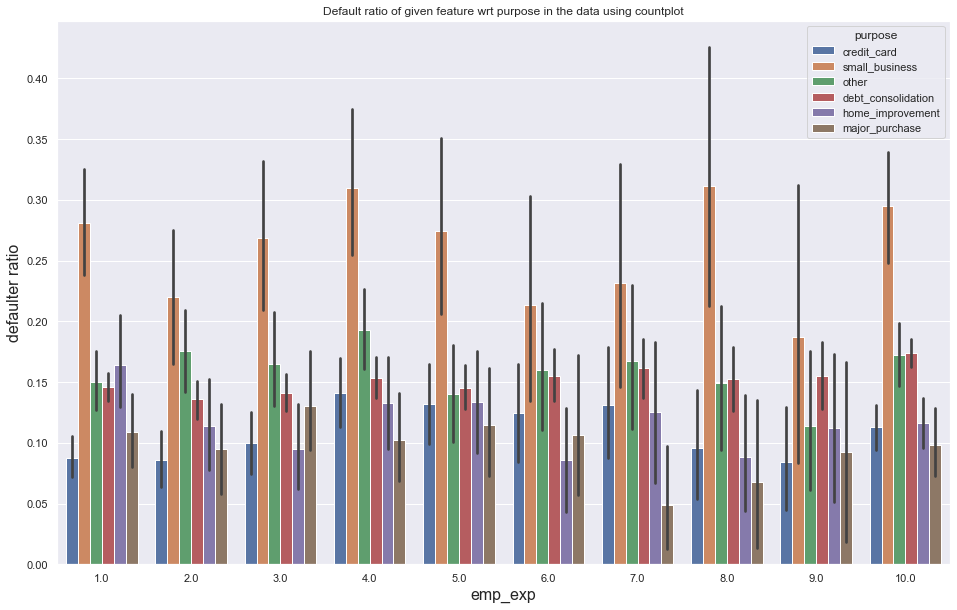

In [96]:
plt.figure(figsize=[16,10])
sns.barplot(x="emp_exp", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("emp_exp", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### emp_exp wrt purpose , this follows no particular, so we can't infer anything properly from it.

### verification_status

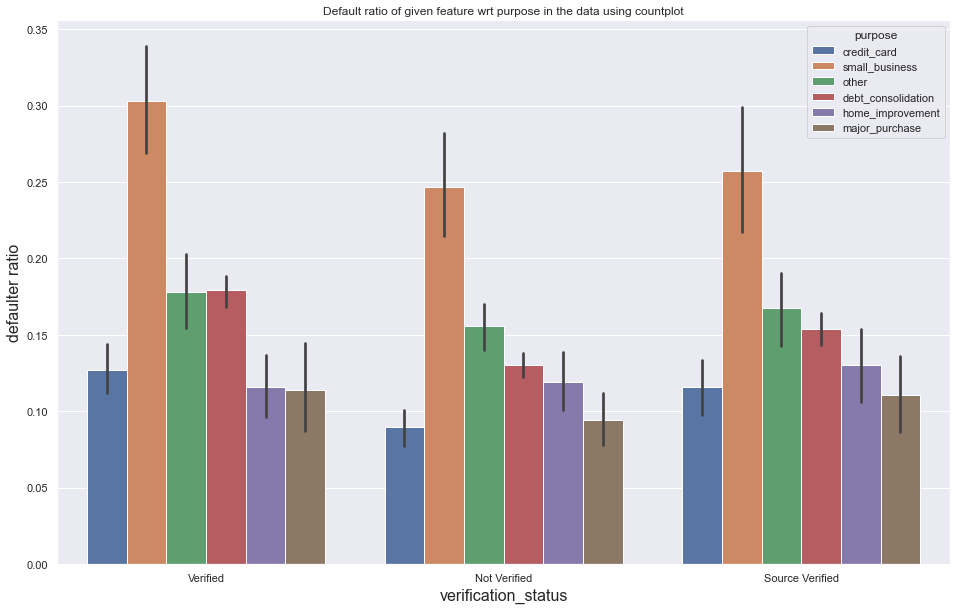

In [97]:
plt.figure(figsize=[16,10])
sns.barplot(x="verification_status", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("verification_status", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### verification wrt purpose , we can observe the verified loans only have higher defaulter's ratio for mostly all the purposes

## Year and Month

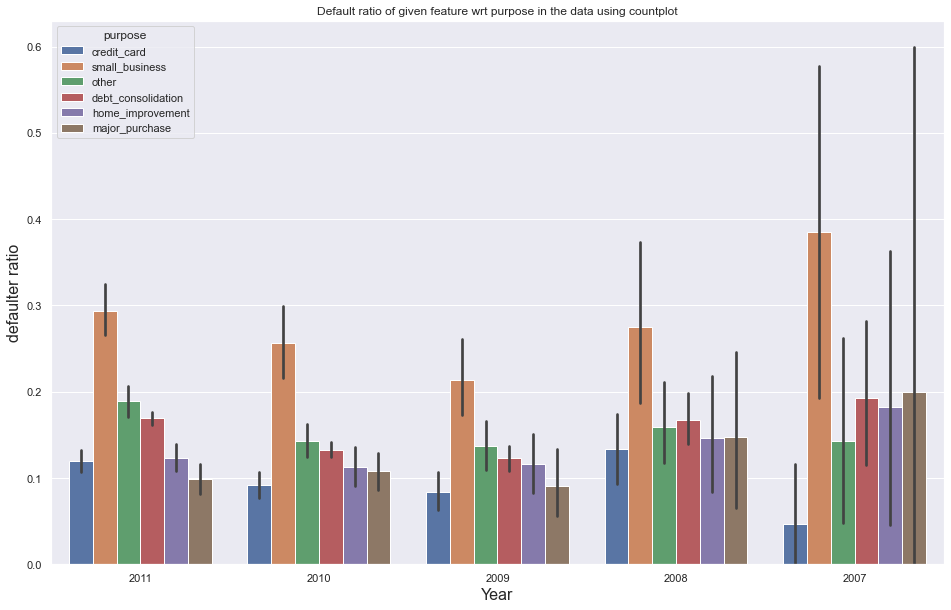

In [98]:
plt.figure(figsize=[16,10])
sns.barplot(x="year", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("Year", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### year wrt purpose , we can have no proper inference from the above graph

### DTI Range

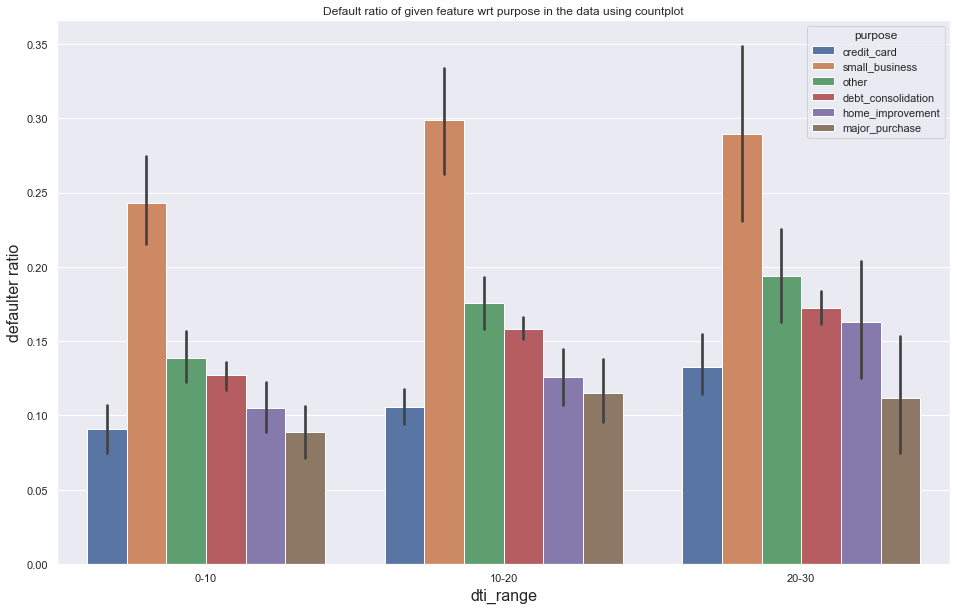

In [99]:
plt.figure(figsize=[16,10])
sns.barplot(x="dti_range", y='default_status', hue='purpose', data=bivardf)
plt.title("Default ratio of given feature wrt purpose in the data using countplot")
plt.xlabel("dti_range", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

 #### dti_range wrt purpose , we can observe the upward trend for all the purposes , defaulter ratio increases with increase of dti ratio of loan.

In [100]:
def diff_rate(cat_var):
    default_rates = df_loan.groupby(cat_var).default_status.mean().sort_values(ascending=False) *100
    return ((default_rates[0] - default_rates[-1]))

In [101]:
dftemp = df_loan.select_dtypes(include=['category'])

In [102]:
dftemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   annual_inc_range       38563 non-null  category
 1   loan_amnt_range        38577 non-null  category
 2   dti_range              38399 non-null  category
 3   int_rate_range         38577 non-null  category
 4   funded_amnt_inv_range  38448 non-null  category
 5   installment_range      38577 non-null  category
dtypes: category(6)
memory usage: 1.8 MB


In [103]:
lis=[]
for x in dftemp.columns:
    temp={ x : diff_rate(x)}
    lis.append(temp)    
lis

[{'annual_inc_range': 8.326938457841523},
 {'loan_amnt_range': 9.68258988278726},
 {'dti_range': 4.175975576367353},
 {'int_rate_range': 31.70235740225997},
 {'funded_amnt_inv_range': 5.986290820369364},
 {'installment_range': 3.382941756307215}]

#### The above dictionary contains the increment /decrement  ranges on the mentioned categorical range variables

### Till Now we saw rate of change of variables wrt purpose, now we can try to use other variables as base and tryout combinations

## For Violin plots, we have to consider the width between curve and the centre line as distribution of customers at that particular y axis point. These distributions can give meaningful insights

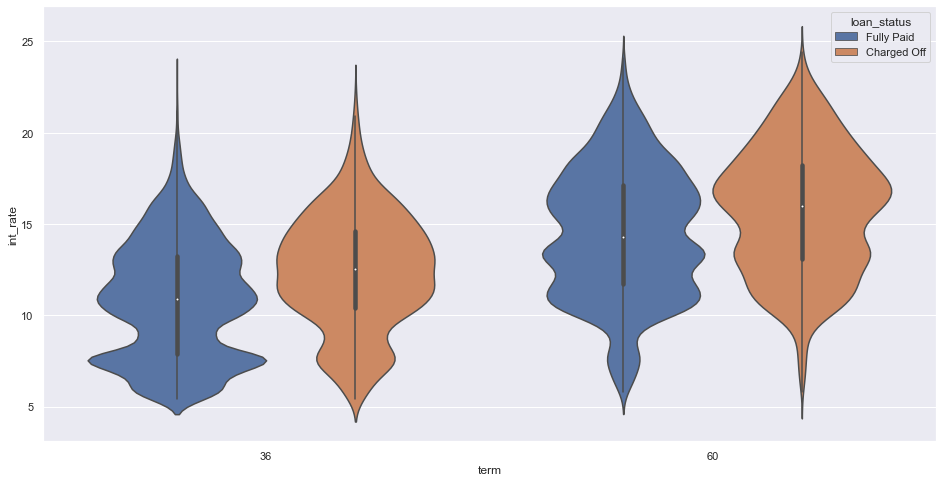

In [104]:
plt.figure(figsize=(16,8))
sns.violinplot(x="term", y="int_rate", data=df_loan, hue='loan_status', order=sorted(df_loan['term'].unique()))
plt.show()

#### Term of loan wrt Interest rates,we can observe the width or distribution from central line Is getting increasing when we Move up interest rate and also its higher for higher term indicating high defaulter ratio.

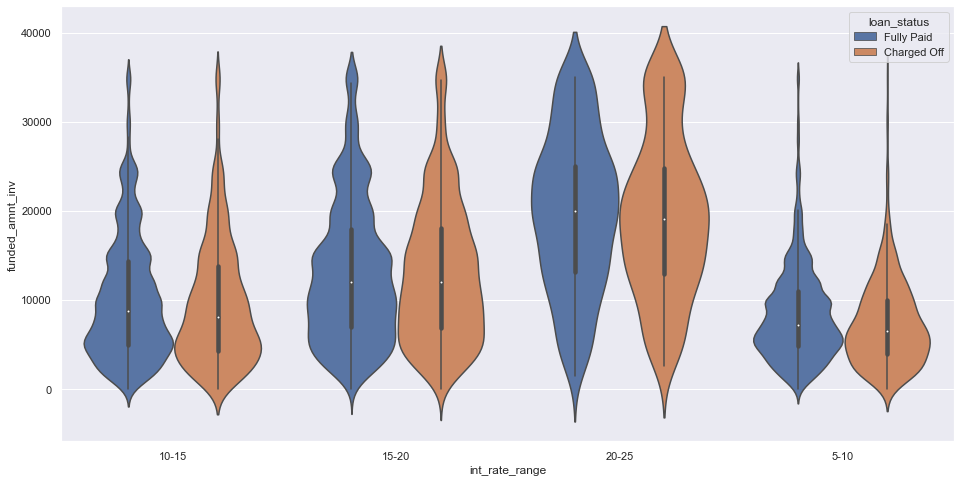

In [105]:
plt.figure(figsize=(16,8))
sns.violinplot(x="int_rate_range", y="funded_amnt_inv", data=df_loan, hue='loan_status', 
               order=sorted(df_loan['int_rate_range'].unique()))
plt.show()

#### Funded amount wrt Interest Range, we can observe the width ordistribution from central line Is getting increasing when we Move up interest rate for Funded amounts indicating high default ratio.

<AxesSubplot:xlabel='term', ylabel='funded_amnt_inv'>

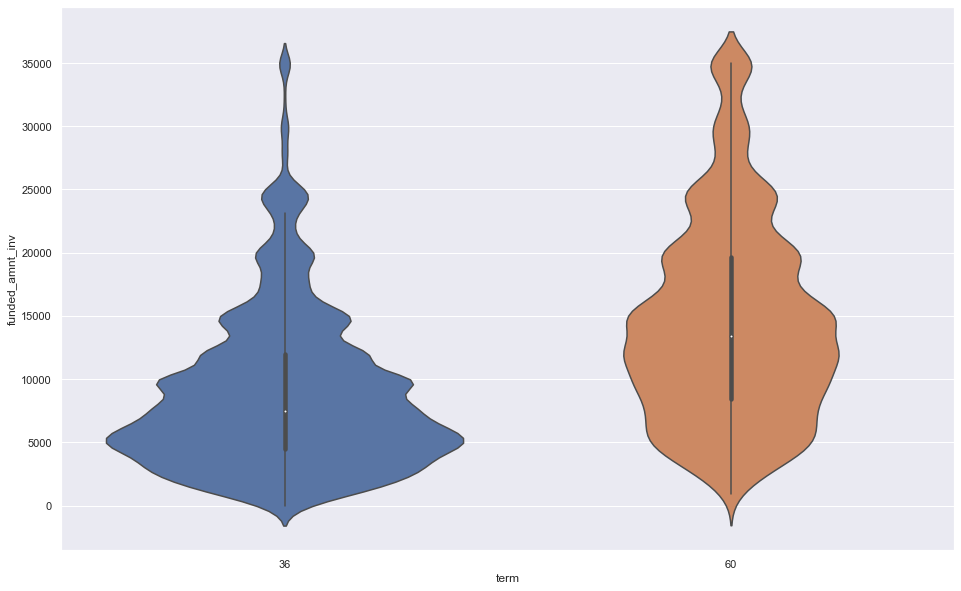

In [106]:
plt.figure(figsize=[16,10])
sns.violinplot( y='funded_amnt_inv', x='term', data=df_loan)

#### Funded amount wrt term, we can observe the width ordistribution from central line Is getting increasing when we Move up on Funded amounts and its high for higher term indicating high default ratio.

<AxesSubplot:xlabel='installment_range', ylabel='funded_amnt_inv'>

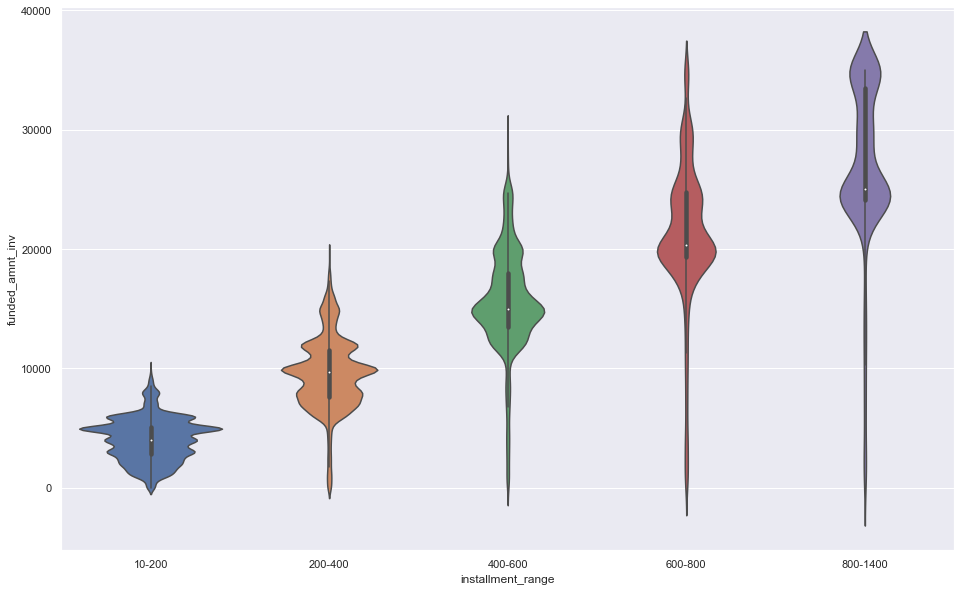

In [107]:
plt.figure(figsize=[16,10])
sns.violinplot( y='funded_amnt_inv', x='installment_range', data=df_loan)

### We are seeing here a simple straight line relationship among The medians of data indicating High correlation.Since we know that both have Higher defaulters at higher ends,We need to be careful for this Combinations. while issueing loans


# Multivariate Analysis

<Figure size 720x504 with 0 Axes>

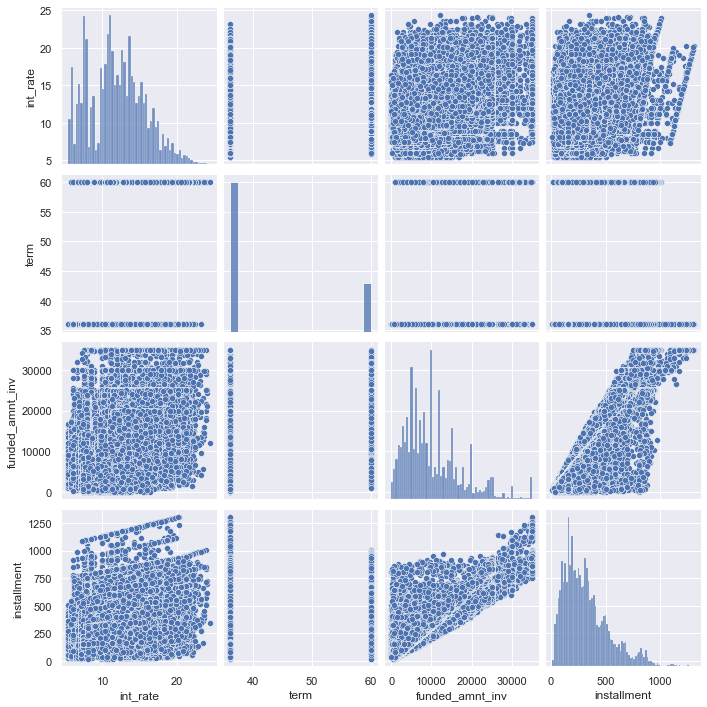

In [108]:
plt.figure(figsize=[10,7])
sns.pairplot(df_loan[['int_rate', 'term', 'funded_amnt_inv','installment']])
plt.show()

### The above pairplot shows that all the mentioned factors are strongly correlated and so we can use them to multivariate using heatmaps

 ### Since the values we mentioned are default_status(0- paid, 1- charged off), the values in heatmaps are the distribution or mean values of defaulters

### For each purpose, how (loan_amount, interest rate) varies

In [111]:
import numpy as np

In [112]:
resp=pd.pivot_table(data=bivardf,index="purpose",columns=["installment_range",'term'],
                   values="default_status",aggfunc=np.mean)

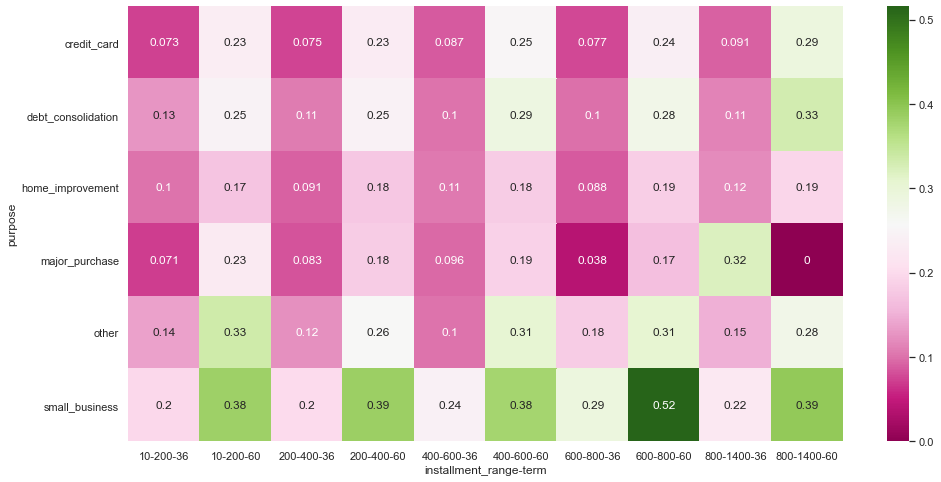

In [113]:
plt.figure(figsize=(16,8))
sns.heatmap(resp,cmap = "PiYG", annot=True)
plt.show()

#### purpose - small_business wrt installment-range 600-800 and 60 months term) have the highest defaulter correlation and followed by other combinations

### For each term, how (dti ranges,  installment amounts) varies

In [114]:
resin=pd.pivot_table(data=bivardf,index="term",columns=["installment_range",'dti_range'],
                   values="default_status",aggfunc=np.mean)

<Figure size 1152x576 with 0 Axes>

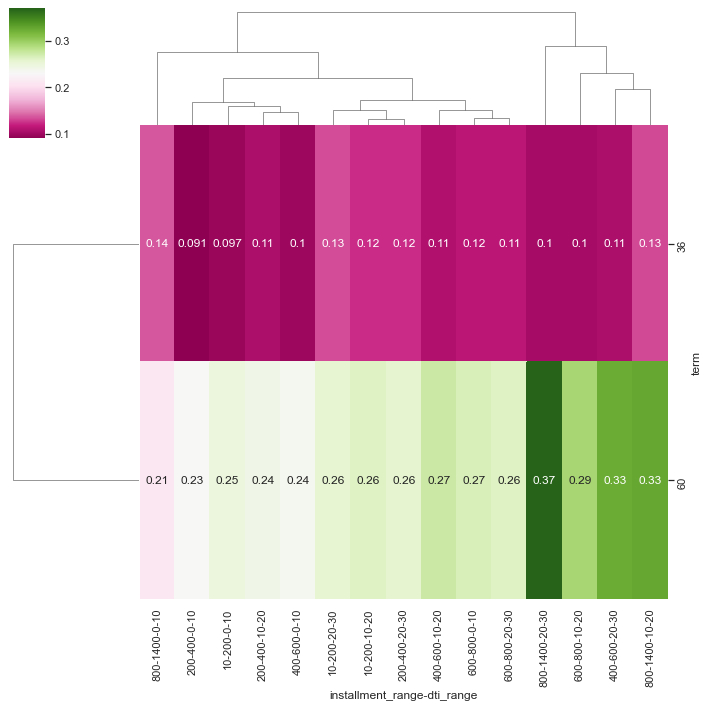

In [115]:
plt.figure(figsize=(16,8))
sns.clustermap(resin,cmap = "PiYG", annot=True)
plt.show()

 #### Clearly the loans with higher term and higher installment and higher dti becomes high risk of defaulting(also showcasing inter-relation and hierarchy among distributions)

### For each purpose, how (funded amount by investor, installment amount) varies

In [116]:
resf=pd.pivot_table(data=bivardf,index="purpose",columns=["installment_range",'funded_amnt_inv_range'],
                   values="default_status",aggfunc=np.mean)

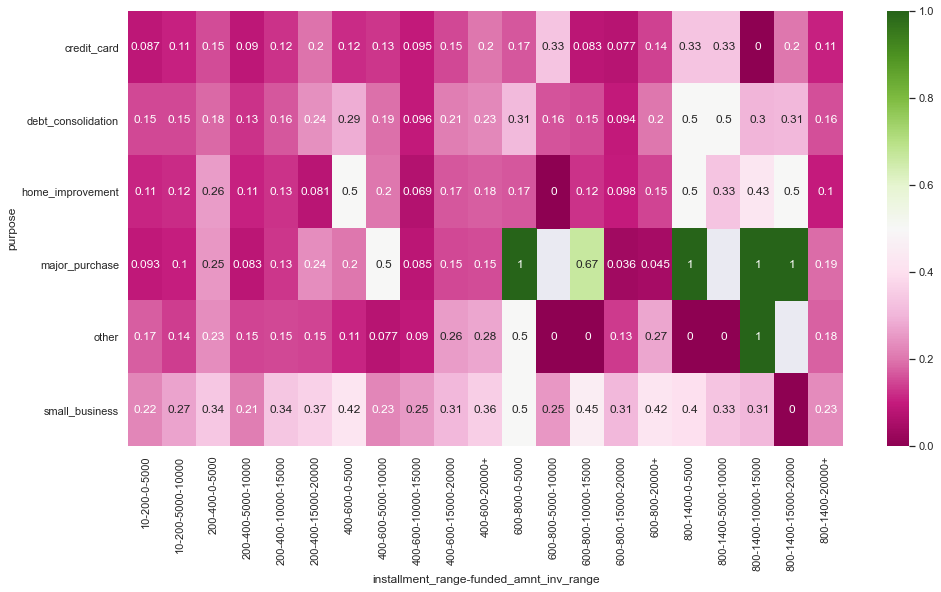

In [117]:
plt.figure(figsize=(16,8))
sns.heatmap(resf,cmap = "PiYG", annot=True)
plt.show()

### A keen observation is that the purpose major purchase has highest defaulter risk for higher factor ranges, but previously we saw that as a whole that purpose is not the highest one.
### We went to granular level and we saw all of those loans of this purpose are defaulters under certain factor ranges

### For different interest rate ranges, how (loan amount, term) varies

In [118]:
res=pd.pivot_table(data=bivardf,index="int_rate_range",columns=["loan_amnt_range",'term'],
                   values="default_status",aggfunc=np.mean)

<Figure size 1152x576 with 0 Axes>

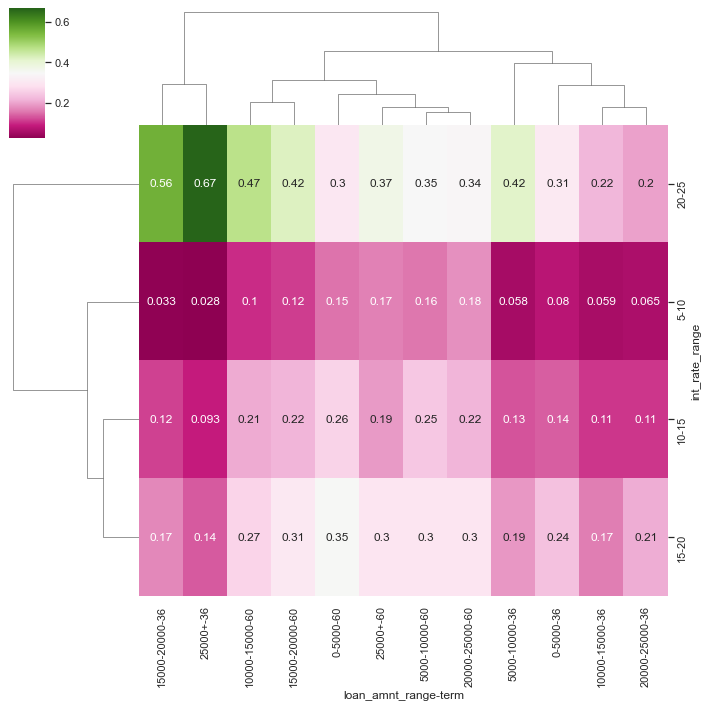

In [119]:
plt.figure(figsize=(16,8))
sns.clustermap(res,cmap = "PiYG", annot=True)
plt.show()

#### (HIgher Interest range wrt loan amount 25000+ and 36 terms) have the highest defaulter correlation. This might be granular result, but we can see that as a whole 60 months term has more correlation combined (also showcasing inter-relation and hierarchy among distributions)

## We can keep on trying out different combinations as mentioned to find out more granular analysis . we specified a few examples among them

### Thank you